### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
# Preprocessing of Numerical and Categorical Data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline
from sklearn import compose

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Read Data
Main: rentals_dataset.csv

Supplemented datasets:
1. hdb_rentals
2. hdb_locations
3. train_locations
4. mrt_locations
5. busstop_locations
6. school_locations
7. moeschools (Generalinformationofschools.csv)
8. intschool_locations
9. shopping_locations

Other Available Datasets:
- hdb_mapping_price_per_sqm.csv
- hdb_mapping_units.csv
- hdb_rentals.csv
- hdb_resales.csv
- mrt_lrt_data.csv
- new_resales.csv
- old_resales.csv

In [4]:
rentals_dataset = pd.read_csv('rentals_dataset.csv', index_col=0)

In [5]:
rentals_dataset

date           town block         street_name flat_type  \
0       2021-01     ANG MO KIO   105    ANG MO KIO AVE 4    4 ROOM   
1       2021-01     ANG MO KIO   107    ANG MO KIO AVE 4    3 ROOM   
2       2021-01     ANG MO KIO   108    ANG MO KIO AVE 4    3 ROOM   
3       2021-01     ANG MO KIO   111    ANG MO KIO AVE 4    5 ROOM   
4       2021-01     ANG MO KIO   111    ANG MO KIO AVE 4    5 ROOM   
...         ...            ...   ...                 ...       ...   
109314  2023-12     QUEENSTOWN    59      STRATHMORE AVE    4 ROOM   
109315  2023-12      WOODLANDS  681D     WOODLANDS DR 62    4 ROOM   
109316  2023-12  CHOA CHU KANG   354  CHOA CHU KANG CTRL    4 ROOM   
109317  2023-12         YISHUN   717        YISHUN ST 71    4 ROOM   
109318  2023-12      TOA PAYOH   159     LOR 1 TOA PAYOH    3 ROOM   

        monthly_rent flat_type_group     region       lat         lng  ...  \
0               2000          4-ROOM  Northeast  1.372313  103.837601  ...   
1               1750          3-ROOM  Northeast  1.371384  103.837381  ...   
2               1750          3-ROOM  Northeast  1.370966  103.838202  ...   
3               2230          5-ROOM  Northeast  1.370851  103.837298  ...   
4               2450          5-ROOM  Northeast  1.370851  103.837298  ...   
...              ...             ...        ...       ...         ...  ...   
109314          4100          4-ROOM    Central  1.293190  103.811253  ...   
109315          3300          4-ROOM      North  1.440000  103.803592  ...   
109316          2950          4-ROOM       West  1.382645  103.743561  ...   
109317          3200          4-ROOM      North  1.425752  103.828104  ...   
109318          1800          3-ROOM    Central  1.330745  103.845601  ...   

        avg_floor_area_sqm  price_sqm    nearest_MRT  mrt_dist  \
0                     92.0      21.74   Yio Chu Kang  1.329716   
1                     78.2      22.38     Ang Mo Kio  1.365741   
2                     74.5      23.49     Ang Mo Kio  1.270434   
3                    117.0      19.06     Ang Mo Kio  1.369690   
4                    117.0      20.94     Ang Mo Kio  1.369690   
...                    ...        ...            ...       ...   
109314                89.3      45.91     Queenstown  0.623560   
109315               103.0      32.04      Admiralty  0.296640   
109316               106.2      27.78  Choa Chu Kang  0.319505   
109317                86.5      36.99         Yishun  0.885971   
109318                70.5      25.53      Toa Payoh  0.275142   

       nearest_shopping  shopping_dist  \
0        Broadway Plaza       0.929260   
1        Broadway Plaza       0.954735   
2        Broadway Plaza       0.868254   
3        Broadway Plaza       0.969552   
4        Broadway Plaza       0.969552   
...                 ...            ...   
109314      Anchorpoint       0.786134   
109315  Admiralty Place       0.232765   
109316          Lot One       0.327919   
109317  Northpoint City       0.964711   
109318   Zhongshan Mall       0.435802   

                                        nearest_intschool  intschool_dist  \
0                         AUSTRALIAN INTERNATIONAL SCHOOL        3.444260   
1                         AUSTRALIAN INTERNATIONAL SCHOOL        3.388034   
2                         AUSTRALIAN INTERNATIONAL SCHOOL        3.290544   
3                         AUSTRALIAN INTERNATIONAL SCHOOL        3.353470   
4                         AUSTRALIAN INTERNATIONAL SCHOOL        3.353470   
...                                                   ...             ...   
109314               S P JAIN SCHOOL OF GLOBAL MANAGEMENT        1.838053   
109315                          SINGAPORE AMERICAN SCHOOL        3.628320   
109316    CANADIAN INTERNATIONAL SCHOOL (LAKESIDE CAMPUS)        4.545849   
109317                          SINGAPORE AMERICAN SCHOOL        5.969455   
109318  LEE KONG CHIAN SCHOOL OF MEDICINE (NOVENA CAMPUS)        1.077919   

          

In [6]:
#Check for Missing Values
print(rentals_dataset.isna().any()) 

date                  False
town                  False
block                 False
street_name           False
flat_type             False
monthly_rent          False
flat_type_group       False
region                False
lat                   False
lng                   False
postal                False
property_age          False
avg_floor_area_sqm    False
price_sqm             False
nearest_MRT           False
mrt_dist              False
nearest_shopping      False
shopping_dist         False
nearest_intschool     False
intschool_dist        False
nearest_hawker        False
hawker_dist           False
dtype: bool


### Data Exploration and Analysis

##### Box plot on monthly rental cost in each town based on flat type

Dashboard: - allow to filter by flat type

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


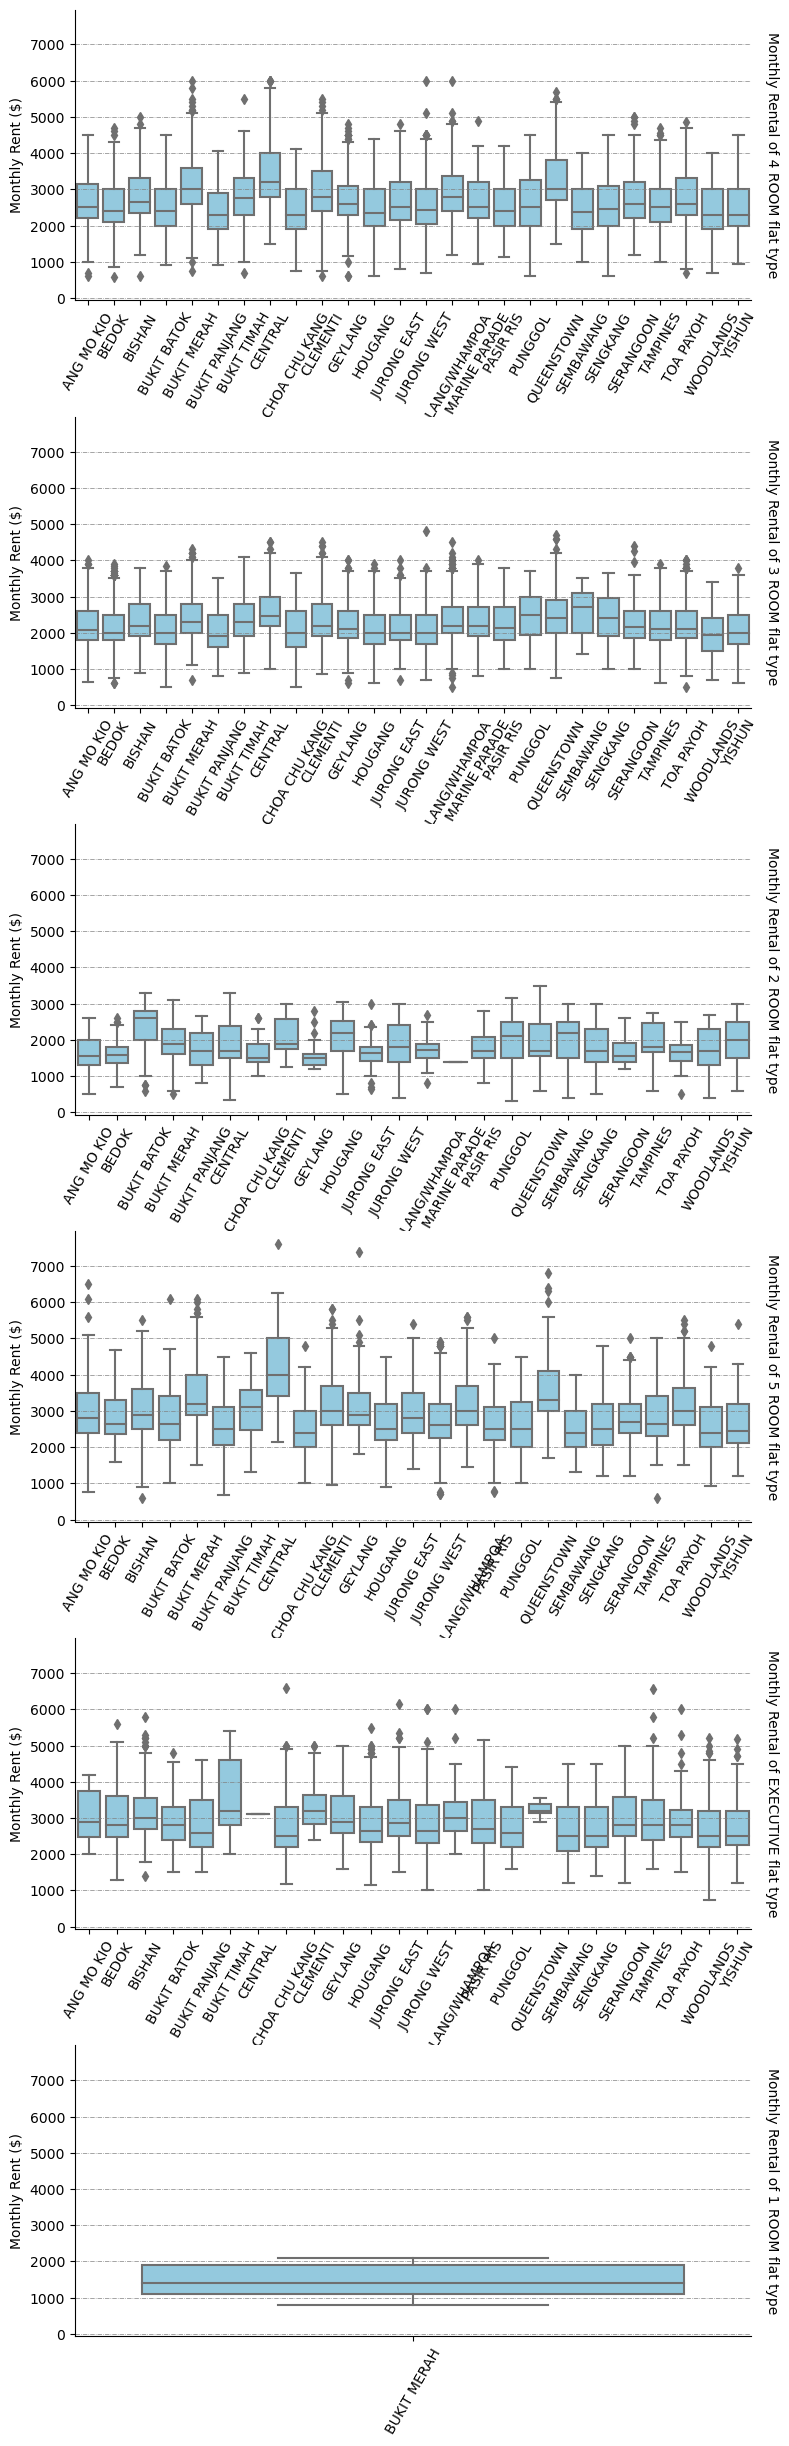

In [7]:
### Plotting ###
#palette = sns.color_palette("flare", n_colors=hdb_rentals['flat_type'].nunique())

g = sns.catplot(
    data=rentals_dataset.sort_values(by='town'),
    y="monthly_rent", x="town", row="flat_type",
    kind="box", orient="v",
    sharex=False, 
    margin_titles=True,
    height=4, aspect=2,
    color="skyblue"
)

# Graph Formatting
g.set(xlabel="", ylabel="Monthly Rent ($)")
g.set_titles(row_template="Monthly Rental of {row_name} flat type")

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60) 
    ax.grid(True, which='both', axis='y', color='gray', linestyle='-.', linewidth=0.5)
    
g.fig.subplots_adjust(hspace=0.4, wspace=0.2) 

plt.savefig('monthlyrent_town.png', dpi=300, bbox_inches='tight')

##### Geospatial plot on rental costing in each town

In [8]:
rentals_dataset['monthly_rent'].describe()

count    104604.000000
mean       2559.120789
std         716.748883
min         300.000000
25%        2000.000000
50%        2400.000000
75%        3000.000000
max        7600.000000
Name: monthly_rent, dtype: float64

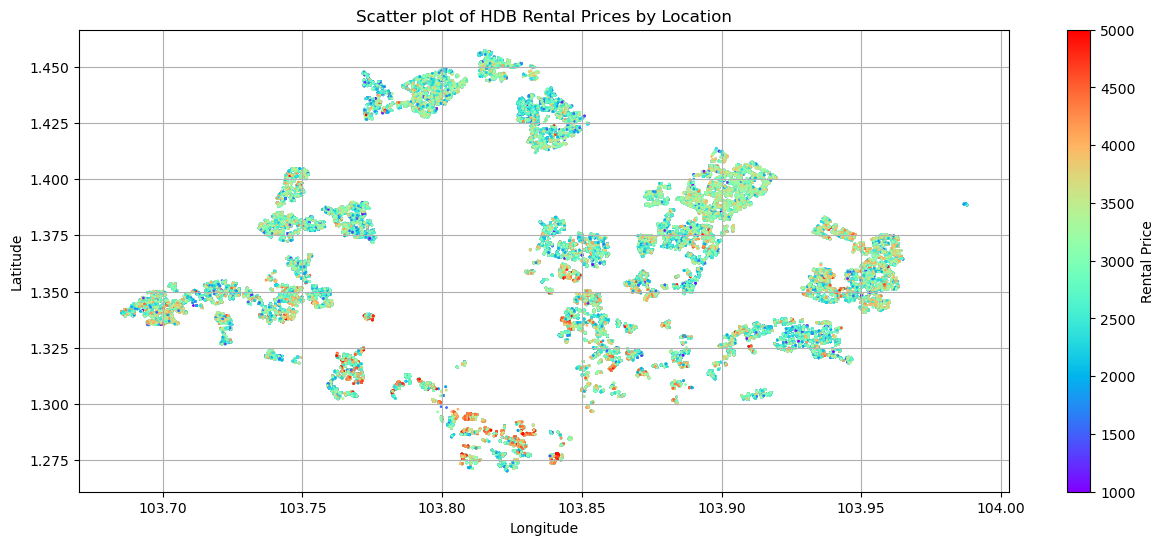

In [9]:
### PLOTTING ###
plt.figure(figsize=(15, 6))
plt.scatter(rentals_dataset['lng'], rentals_dataset['lat'], 
            c=rentals_dataset['monthly_rent'], cmap='rainbow', s=1,
            vmin=1000, vmax=5000)

### Formatting
plt.colorbar(label='Rental Price') # Adding a color bar which maps values to colors.
plt.grid(True)
plt.title('Scatter plot of HDB Rental Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.xlim(min_longitude, max_longitude)
#plt.ylim(min_latitude, max_latitude)

# Show the plot.
plt.show()


In [10]:
## DATA INVESTIGATION
rentals_dataset[rentals_dataset['monthly_rent'] == rentals_dataset['monthly_rent'].max()]


date     town block     street_name flat_type  monthly_rent  \
103956  2023-11  CENTRAL     2  TG PAGAR PLAZA    5 ROOM          7600   

       flat_type_group   region       lat         lng  ...  \
103956          5-ROOM  Central  1.275237  103.842605  ...   

        avg_floor_area_sqm  price_sqm    nearest_MRT  mrt_dist  \
103956               123.5      61.54  Tanjong Pagar  0.480517   

            nearest_shopping  shopping_dist  \
103956  Tanjong Pagar Centre       0.046414   

                                 nearest_intschool  intschool_dist  \
103956  DUKE-NUS GRADUATE MEDICAL SCHOOL SINGAPORE        1.152274   

               nearest_hawker  hawker_dist  
103956  6 Tanjong Pagar Plaza     0.165172  

[1 rows x 22 columns]

In [11]:
## DATA INVESTIGATION
rentals_dataset[rentals_dataset['monthly_rent'] == rentals_dataset['monthly_rent'].min()]


date     town block   street_name flat_type  monthly_rent  \
49987  2022-04  PUNGGOL  623C  PUNGGOL CTRL    2 ROOM           300   

      flat_type_group     region       lat         lng  ...  \
49987          2-ROOM  Northeast  1.399633  103.911458  ...   

       avg_floor_area_sqm  price_sqm  nearest_MRT  mrt_dist nearest_shopping  \
49987                46.0       6.52      Punggol  1.184996   Oasis Terraces   

       shopping_dist                 nearest_intschool  intschool_dist  \
49987       0.400879  OVERSEAS FAMILY SCHOOL SINGAPORE        3.956918   

                   nearest_hawker  hawker_dist  
49987  Kovan Market & Food Centre     5.321818  

[1 rows x 22 columns]

### Data Preprocessing

Identify useful features and drop unnecessary features from the df

In [12]:
from datetime import datetime

# Transform date to more usable format
rentals_dataset['date'] = pd.to_datetime(rentals_dataset['date'])
reference_date = datetime(2023, 12, 31)

# Calculate the difference in months
rentals_dataset['months_duration'] = (
    (rentals_dataset['date'].dt.year - reference_date.year) * 12 +
    (rentals_dataset['date'].dt.month - reference_date.month)
)
rentals_dataset

date           town block         street_name flat_type  \
0      2021-01-01     ANG MO KIO   105    ANG MO KIO AVE 4    4 ROOM   
1      2021-01-01     ANG MO KIO   107    ANG MO KIO AVE 4    3 ROOM   
2      2021-01-01     ANG MO KIO   108    ANG MO KIO AVE 4    3 ROOM   
3      2021-01-01     ANG MO KIO   111    ANG MO KIO AVE 4    5 ROOM   
4      2021-01-01     ANG MO KIO   111    ANG MO KIO AVE 4    5 ROOM   
...           ...            ...   ...                 ...       ...   
109314 2023-12-01     QUEENSTOWN    59      STRATHMORE AVE    4 ROOM   
109315 2023-12-01      WOODLANDS  681D     WOODLANDS DR 62    4 ROOM   
109316 2023-12-01  CHOA CHU KANG   354  CHOA CHU KANG CTRL    4 ROOM   
109317 2023-12-01         YISHUN   717        YISHUN ST 71    4 ROOM   
109318 2023-12-01      TOA PAYOH   159     LOR 1 TOA PAYOH    3 ROOM   

        monthly_rent flat_type_group     region       lat         lng  ...  \
0               2000          4-ROOM  Northeast  1.372313  103.837601  ...   
1               1750          3-ROOM  Northeast  1.371384  103.837381  ...   
2               1750          3-ROOM  Northeast  1.370966  103.838202  ...   
3               2230          5-ROOM  Northeast  1.370851  103.837298  ...   
4               2450          5-ROOM  Northeast  1.370851  103.837298  ...   
...              ...             ...        ...       ...         ...  ...   
109314          4100          4-ROOM    Central  1.293190  103.811253  ...   
109315          3300          4-ROOM      North  1.440000  103.803592  ...   
109316          2950          4-ROOM       West  1.382645  103.743561  ...   
109317          3200          4-ROOM      North  1.425752  103.828104  ...   
109318          1800          3-ROOM    Central  1.330745  103.845601  ...   

        price_sqm    nearest_MRT  mrt_dist  nearest_shopping shopping_dist  \
0           21.74   Yio Chu Kang  1.329716    Broadway Plaza      0.929260   
1           22.38     Ang Mo Kio  1.365741    Broadway Plaza      0.954735   
2           23.49     Ang Mo Kio  1.270434    Broadway Plaza      0.868254   
3           19.06     Ang Mo Kio  1.369690    Broadway Plaza      0.969552   
4           20.94     Ang Mo Kio  1.369690    Broadway Plaza      0.969552   
...           ...            ...       ...               ...           ...   
109314      45.91     Queenstown  0.623560       Anchorpoint      0.786134   
109315      32.04      Admiralty  0.296640   Admiralty Place      0.232765   
109316      27.78  Choa Chu Kang  0.319505           Lot One      0.327919   
109317      36.99         Yishun  0.885971   Northpoint City      0.964711   
109318      25.53      Toa Payoh  0.275142    Zhongshan Mall      0.435802   

                                        nearest_intschool intschool_dist  \
0                         AUSTRALIAN INTERNATIONAL SCHOOL       3.444260   
1                         AUSTRALIAN INTERNATIONAL SCHOOL       3.388034   
2                         AUSTRALIAN INTERNATIONAL SCHOOL       3.290544   
3                         AUSTRALIAN INTERNATIONAL SCHOOL       3.353470   
4                         AUSTRALIAN INTERNATIONAL SCHOOL       3.353470   
...                                                   ...            ...   
109314               S P JAIN SCHOOL OF GLOBAL MANAGEMENT       1.838053   
109315                          SINGAPORE AMERICAN SCHOOL       3.628320   
109316    CANADIAN INTERNATIONAL SCHOOL (LAKESIDE CAMPUS)       4.545849   
109317                          SINGAPORE AMERICAN SCHOOL       5.969455   
109318  LEE KONG CHIAN SCHOOL OF MEDICINE (NOVENA CAMPUS)       1.077919   

                             nearest_hawker hawker_dist  months_duration  
0             Blks 160/162 Ang Mo Kio Ave 4    0.244028              -35  
1             Blks 160/162 Ang Mo Kio Ave 4    0.344891              -35  
2             Blks 160/162 Ang Mo Kio Ave 4    0.357068              -35  
3             Blks 160/162 Ang Mo Kio Ave 4    0.401847      

In [13]:
rentals_dataset.columns

Index(['date', 'town', 'block', 'street_name', 'flat_type', 'monthly_rent',
       'flat_type_group', 'region', 'lat', 'lng', 'postal', 'property_age',
       'avg_floor_area_sqm', 'price_sqm', 'nearest_MRT', 'mrt_dist',
       'nearest_shopping', 'shopping_dist', 'nearest_intschool',
       'intschool_dist', 'nearest_hawker', 'hawker_dist', 'months_duration'],
      dtype='object')

In [14]:
# Reduced data set to drop columns that might not be useful for the initial model

reduced_df = rentals_dataset[['town', 'flat_type', 'property_age', 'avg_floor_area_sqm',
                              'mrt_dist', 'shopping_dist', 'intschool_dist', 'hawker_dist', 
                              'months_duration', 'monthly_rent']]
reduced_df

town flat_type  property_age  avg_floor_area_sqm  mrt_dist  \
0          ANG MO KIO    4 ROOM          45.0                92.0  1.329716   
1          ANG MO KIO    3 ROOM          45.0                78.2  1.365741   
2          ANG MO KIO    3 ROOM          45.0                74.5  1.270434   
3          ANG MO KIO    5 ROOM          45.0               117.0  1.369690   
4          ANG MO KIO    5 ROOM          45.0               117.0  1.369690   
...               ...       ...           ...                 ...       ...   
109314     QUEENSTOWN    4 ROOM          23.0                89.3  0.623560   
109315      WOODLANDS    4 ROOM          23.0               103.0  0.296640   
109316  CHOA CHU KANG    4 ROOM          30.0               106.2  0.319505   
109317         YISHUN    4 ROOM          36.0                86.5  0.885971   
109318      TOA PAYOH    3 ROOM          51.0                70.5  0.275142   

        shopping_dist  intschool_dist  hawker_dist  months_duration  \
0            0.929260        3.444260     0.244028              -35   
1            0.954735        3.388034     0.344891              -35   
2            0.868254        3.290544     0.357068              -35   
3            0.969552        3.353470     0.401847              -35   
4            0.969552        3.353470     0.401847              -35   
...               ...             ...          ...              ...   
109314       0.786134        1.838053     0.782664                0   
109315       0.232765        3.628320     2.932362                0   
109316       0.327919        4.545849     4.345762                0   
109317       0.964711        5.969455     0.635330                0   
109318       0.435802        1.077919     0.817777                0   

        monthly_rent  
0               2000  
1               1750  
2               1750  
3               2230  
4               2450  
...              ...  
109314          4100  
109315          3300  
109316          2950  
109317          3200  
109318          1800  

[104604 rows x 10 columns]

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


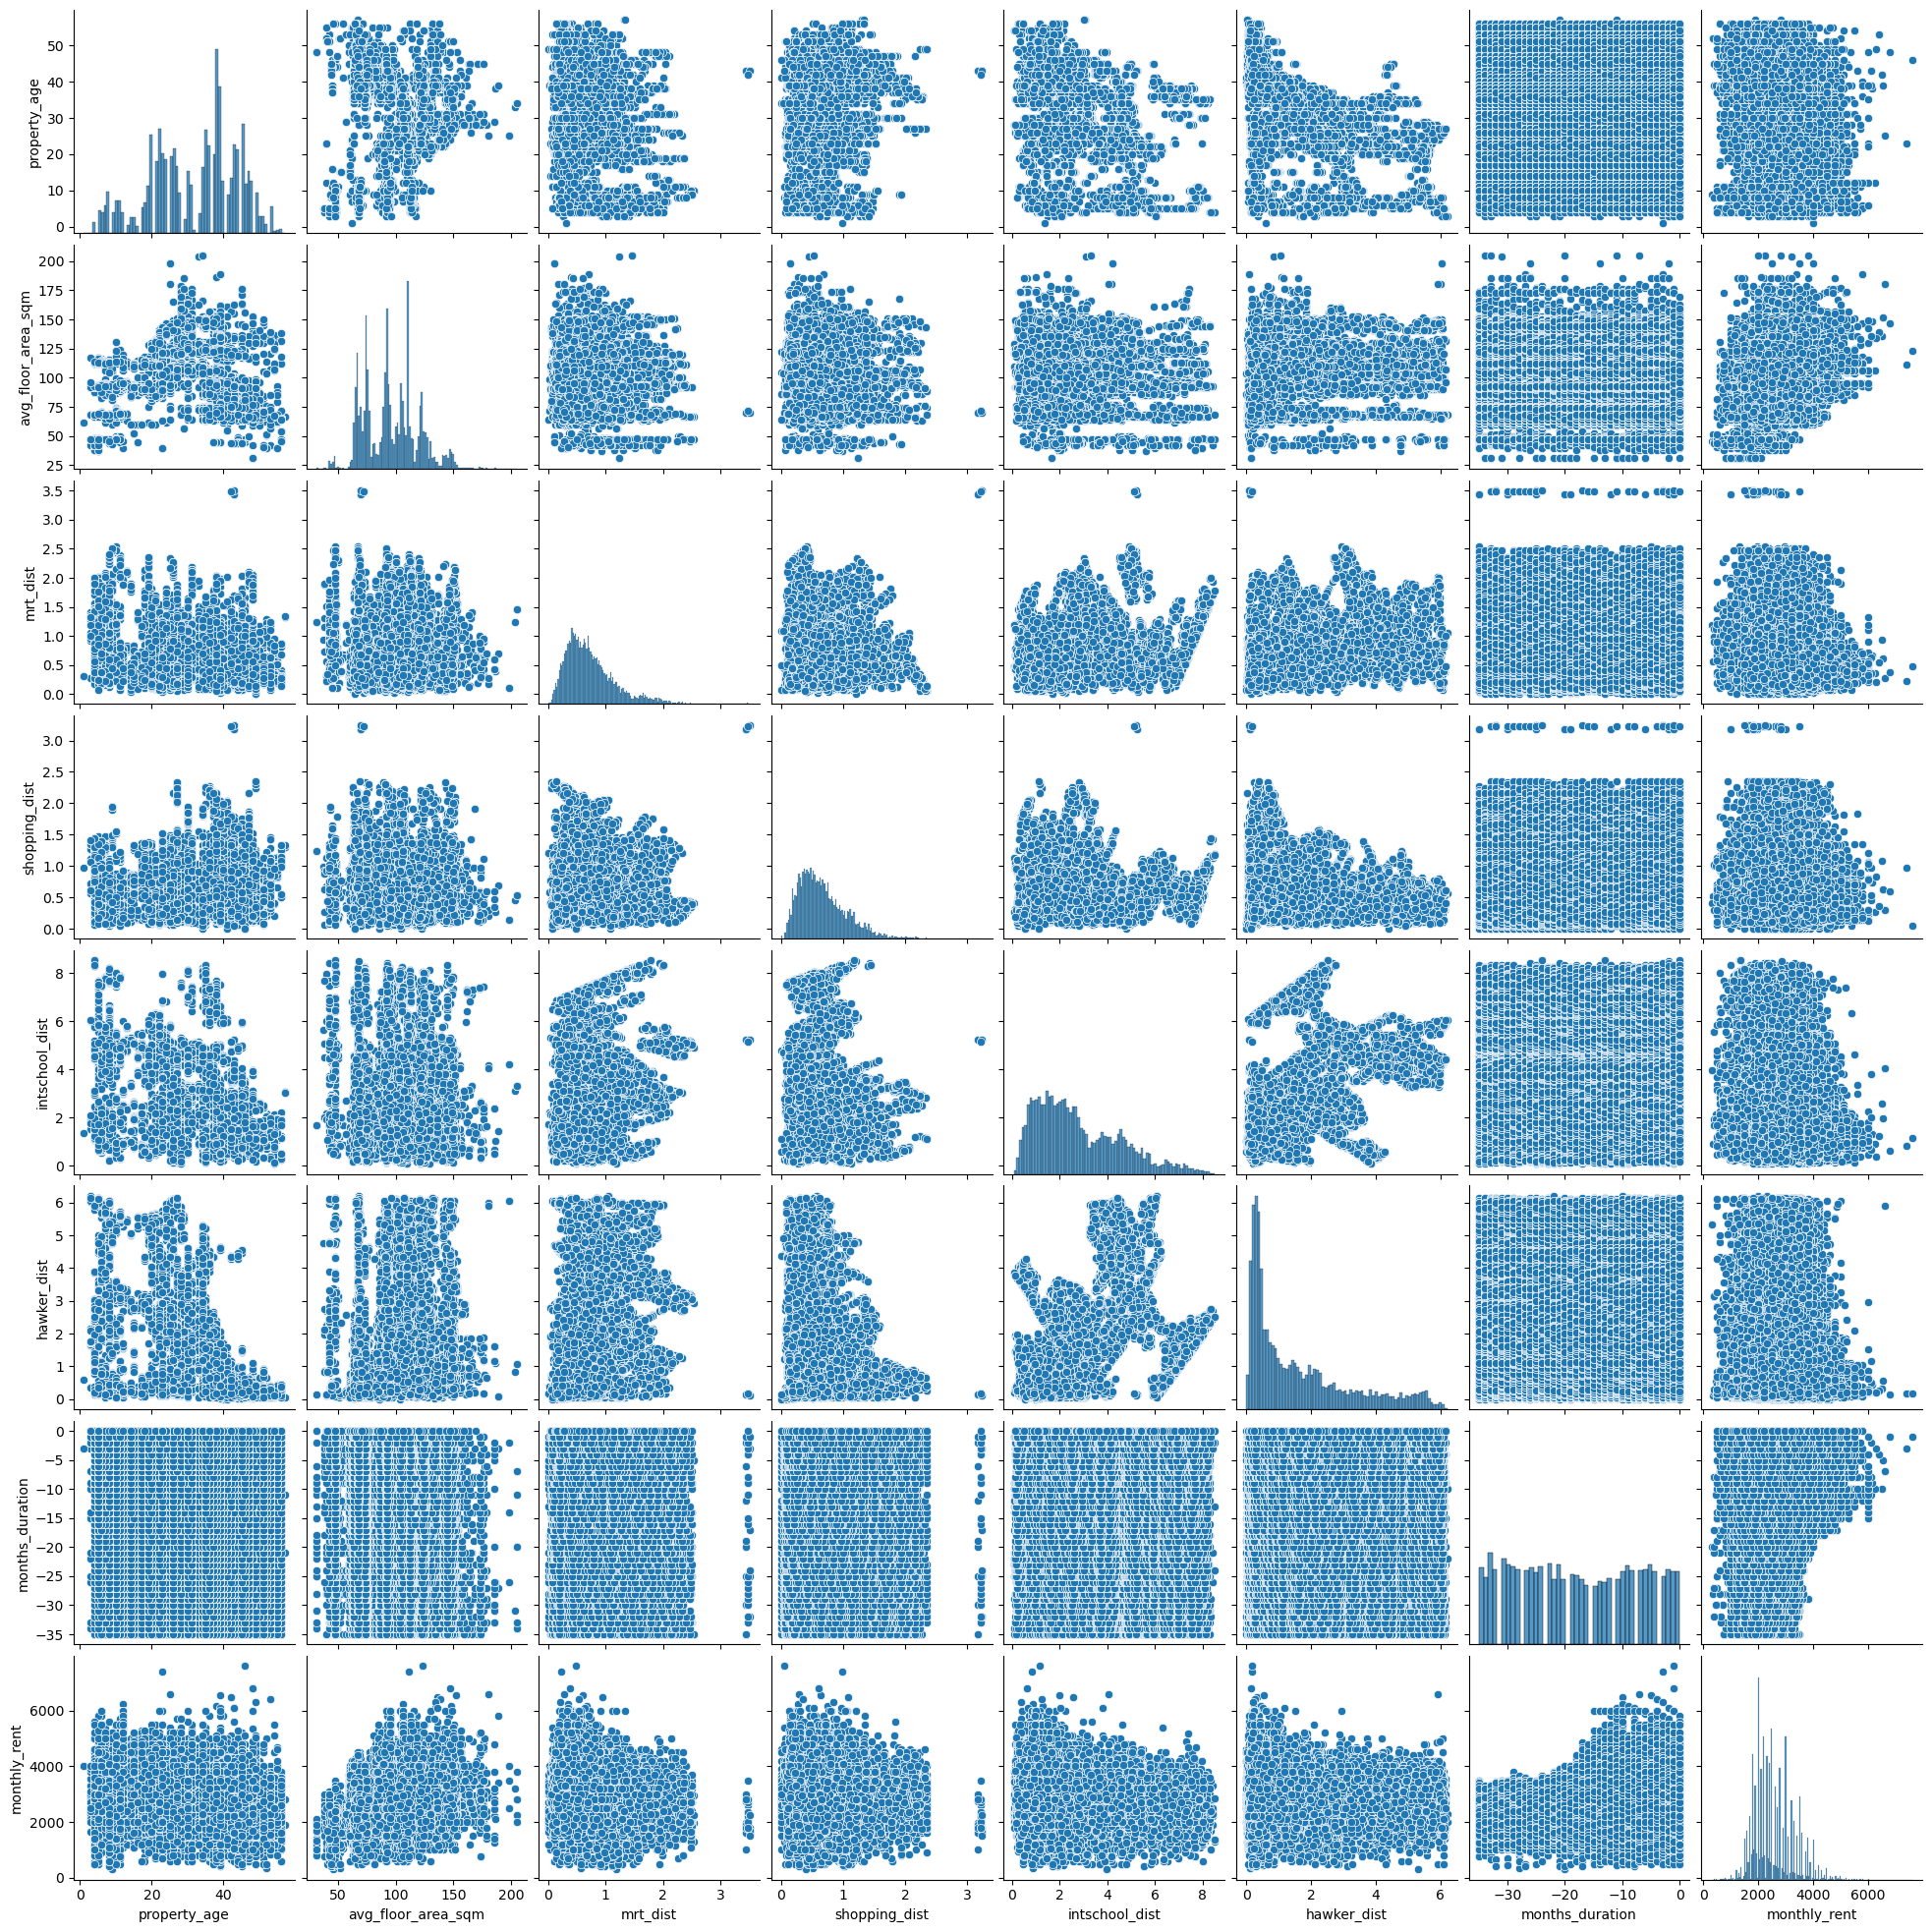

In [15]:
sns.pairplot(reduced_df)

Convert Categorical Variables using one-hot encoding

In [18]:
original_col = pd.get_dummies(reduced_df).columns
preprocessed_df = pd.get_dummies(reduced_df, drop_first=True, dtype=int)
dummy_var = set(original_col) - set(preprocessed_df.columns)

print('Dummy variables are', dummy_var)
preprocessed_df.head()

Dummy variables are {'flat_type_1 ROOM', 'town_ANG MO KIO'}


property_age  avg_floor_area_sqm  mrt_dist  shopping_dist  intschool_dist  \
0          45.0                92.0  1.329716       0.929260        3.444260   
1          45.0                78.2  1.365741       0.954735        3.388034   
2          45.0                74.5  1.270434       0.868254        3.290544   
3          45.0               117.0  1.369690       0.969552        3.353470   
4          45.0               117.0  1.369690       0.969552        3.353470   

   hawker_dist  months_duration  monthly_rent  town_BEDOK  town_BISHAN  ...  \
0     0.244028              -35          2000           0            0  ...   
1     0.344891              -35          1750           0            0  ...   
2     0.357068              -35          1750           0            0  ...   
3     0.401847              -35          2230           0            0  ...   
4     0.401847              -35          2450           0            0  ...   

   town_SERANGOON  town_TAMPINES  town_TOA PAYOH  town_WOODLANDS  town_YISHUN  \
0               0              0               0               0            0   
1               0              0               0               0            0   
2               0              0               0               0            0   
3               0              0               0               0            0   
4               0              0               0               0            0   

   flat_type_2 ROOM  flat_type_3 ROOM  flat_type_4 ROOM  flat_type_5 ROOM  \
0                 0                 0                 1                 0   
1                 0                 1                 0                 0   
2                 0                 1                 0                 0   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   flat_type_EXECUTIVE  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 38 columns]

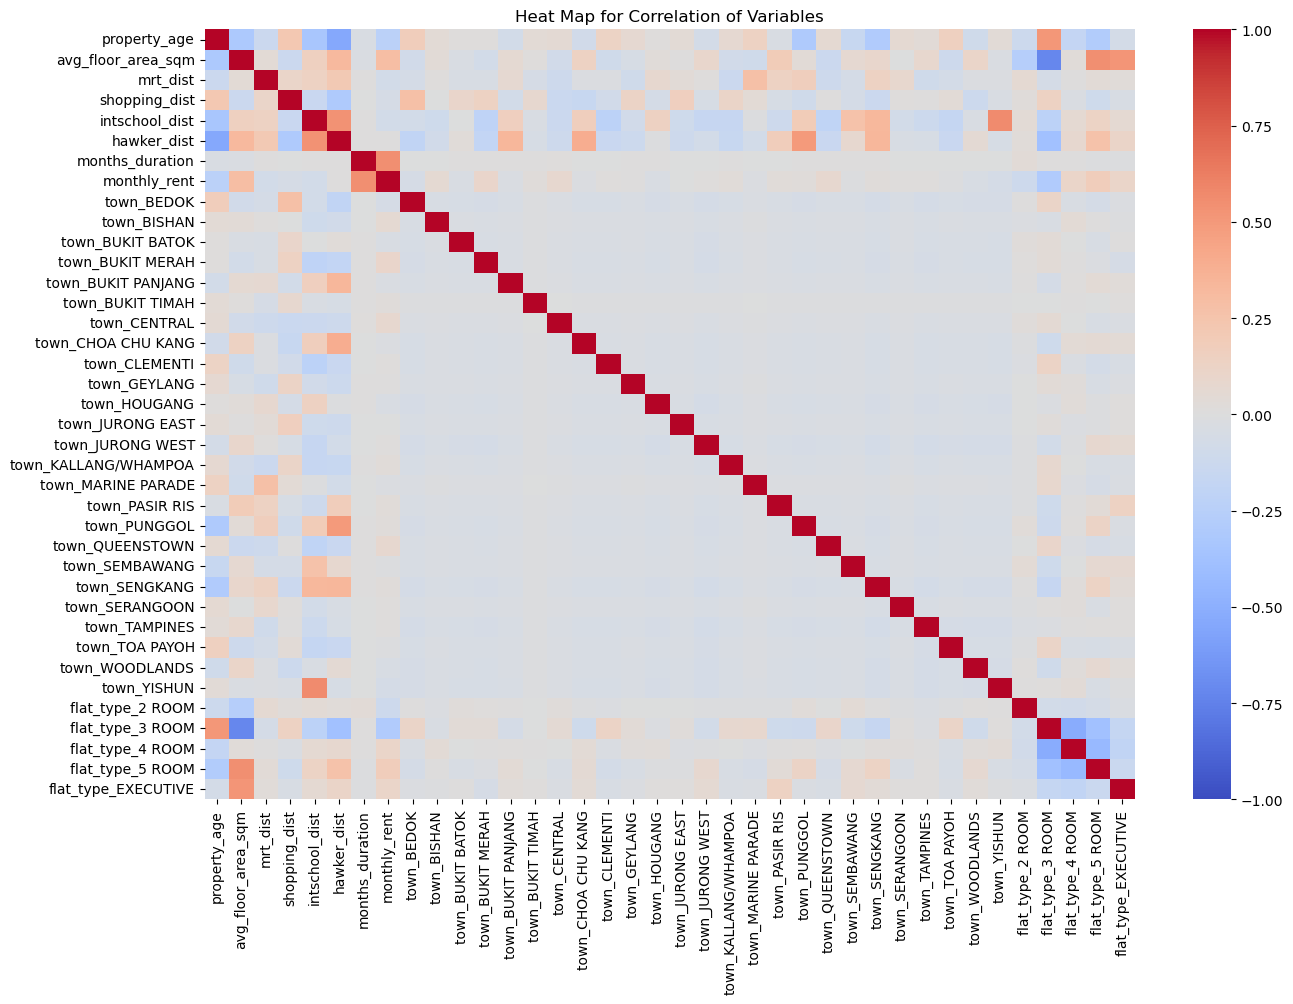

In [19]:
# Calculate the correlation matrix
corr_matrix = preprocessed_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Heat Map for Correlation of Variables')
plt.show()


## Data Modeling

In [20]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

#### Simple Regression


In [21]:
preprocessed_df.columns = preprocessed_df.columns.str.replace(' ','_')
preprocessed_df.rename(columns={'town_KALLANG/WHAMPOA':'town_KALLANG_WHAMPOA'}, inplace=True)

x_variables = list(preprocessed_df.columns)
y_variable = 'monthly_rent'

try: x_variables.remove(y_variable)
except ValueError: pass

In [22]:
linear_model = smf.ols(data=preprocessed_df, formula=f'{y_variable} ~ {"+".join(x_variables)}').fit()
# print(linear_model.summary())
# print(f'Dummy Variables: {dummy_var}')

# R2 0.522, not great. Tried log(y) but got lower R2
# intschool_dist and town_Geylang are not significant at the 1% level.

try: x_variables.remove('intschool_dist')
except ValueError: pass

linear_model = smf.ols(data=preprocessed_df, formula=f'{y_variable} ~ {"+".join(x_variables)}').fit()
print(linear_model.summary())
print(f'Dummy Variables: {dummy_var}')

                            OLS Regression Results                            
Dep. Variable:           monthly_rent   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     3167.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:37:26   Log-Likelihood:            -7.9761e+05
No. Observations:              104604   AIC:                         1.595e+06
Df Residuals:                  104567   BIC:                         1.596e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2601.2404 

Text(0.5, 1.0, 'Actual y vs Pred y')

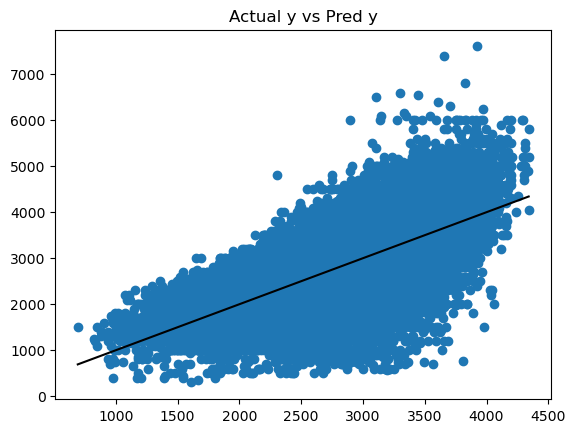

In [25]:
y = preprocessed_df[y_variable]
pred_y = linear_model.fittedvalues
plt.scatter(pred_y, y)
plt.plot([min(pred_y), max(pred_y)], [min(pred_y), max(pred_y)], color='black')
plt.title('Actual y vs Pred y')

#### Try Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

rng = 1

X_train, X_test, y_train, y_test = train_test_split(preprocessed_df[x_variables], y, test_size=0.20, random_state=rng )

for i in range(1,16):
    dtr = DecisionTreeRegressor( max_depth=i, random_state=rng )
    dtr.fit( X_train, y_train )
    y_train_pred = dtr.predict( X_train )
    y_test_pred = dtr.predict( X_test )
    
    print('Depth', i)
    print('Train MSE', int(mean_squared_error( y_train, y_train_pred )))
    print(f'Train R2 {r2_score( y_train, y_train_pred ):.3f}')
    print('Test MSE', int(mean_squared_error( y_test, y_test_pred )))
    print(f'Test R2 {r2_score( y_test, y_test_pred ):.3f}')
    print()


Depth 1
Train MSE 368505
Train R2 0.283
Test MSE 373046
Test R2 0.272

Depth 2
Train MSE 312175
Train R2 0.393
Test MSE 318502
Test R2 0.379

Depth 3
Train MSE 296383
Train R2 0.423
Test MSE 304673
Test R2 0.406

Depth 4
Train MSE 282972
Train R2 0.449
Test MSE 290184
Test R2 0.434

Depth 5
Train MSE 267019
Train R2 0.481
Test MSE 274962
Test R2 0.464

Depth 6
Train MSE 255653
Train R2 0.503
Test MSE 265347
Test R2 0.482

Depth 7
Train MSE 247905
Train R2 0.518
Test MSE 260533
Test R2 0.492

Depth 8
Train MSE 241122
Train R2 0.531
Test MSE 256689
Test R2 0.499

Depth 9
Train MSE 233977
Train R2 0.545
Test MSE 256212
Test R2 0.500

Depth 10
Train MSE 225593
Train R2 0.561
Test MSE 258356
Test R2 0.496

Depth 11
Train MSE 216593
Train R2 0.579
Test MSE 262051
Test R2 0.489

Depth 12
Train MSE 206807
Train R2 0.598
Test MSE 267601
Test R2 0.478

Depth 13
Train MSE 195874
Train R2 0.619
Test MSE 275974
Test R2 0.462

Depth 14
Train MSE 183706
Train R2 0.643
Test MSE 281622
Test R2 0.451

D

Varying across Decision Trees of varying depth, we see that overfitting starts to set in around a max depth of 8. The maximum R2 achieved is only about 0.5 which is not much better than OLS. 

#### Residual Analysis

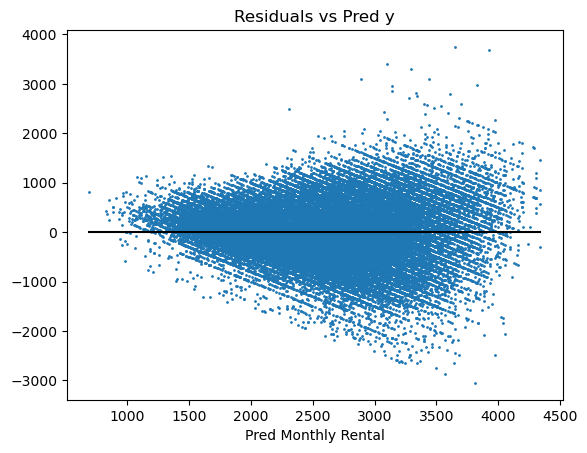

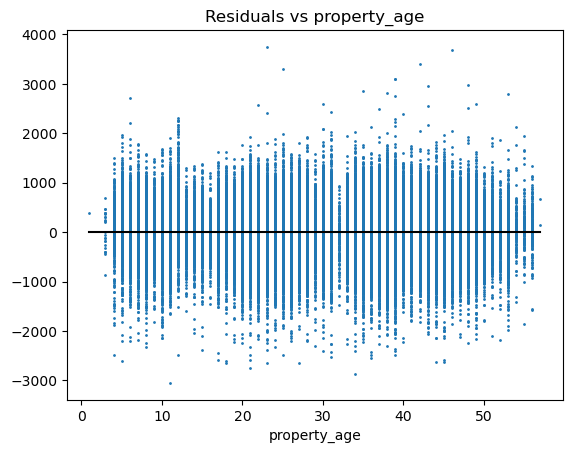

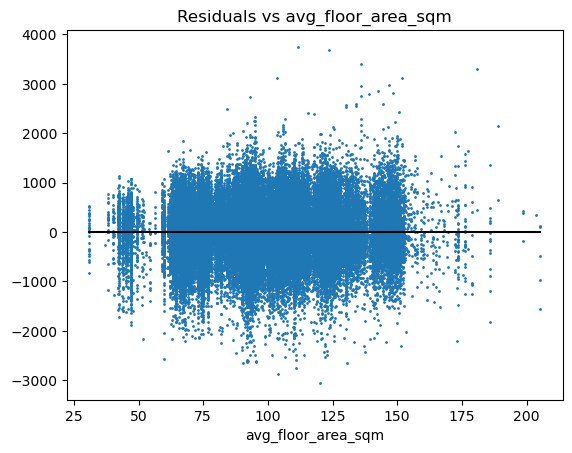

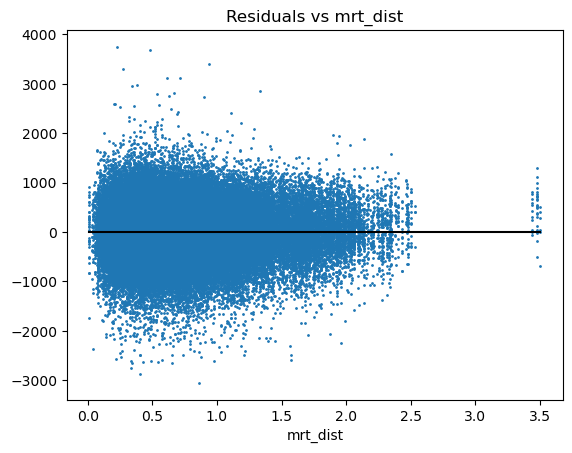

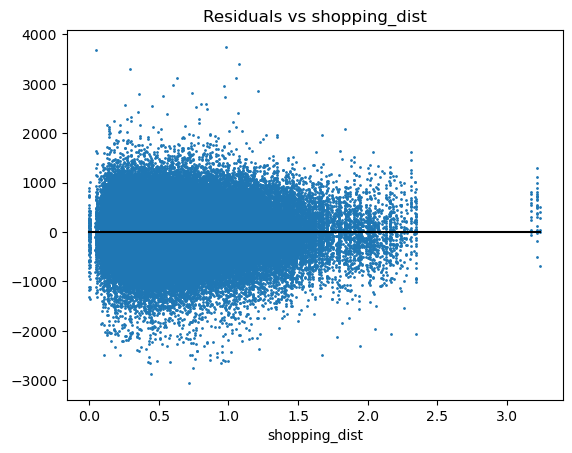

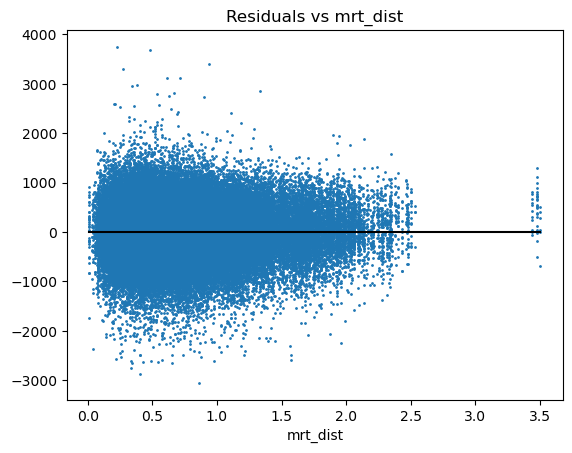

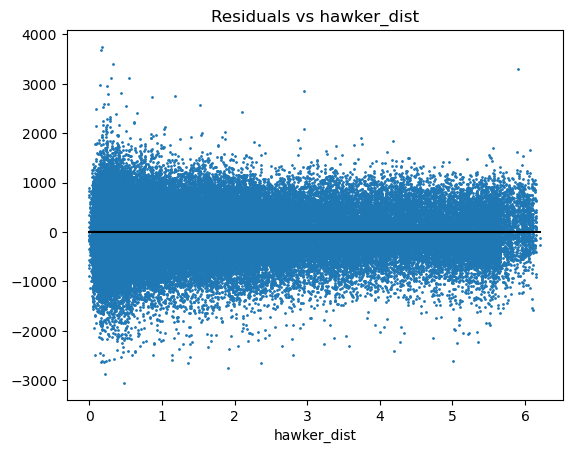

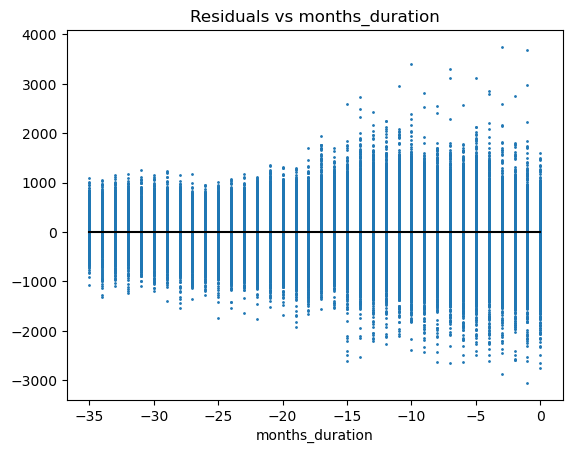

In [28]:
plt.scatter(pred_y, linear_model.resid, s=1)
plt.plot([min(pred_y),max(pred_y)],[0,0], color='black')
plt.title('Residuals vs Pred y')
plt.xlabel('Pred Monthly Rental')
plt.show()

for var in ['property_age', 'avg_floor_area_sqm', 'mrt_dist', 'shopping_dist', 
            'mrt_dist', 'hawker_dist', 'months_duration']:
    plt.scatter(preprocessed_df[var], linear_model.resid, s=1)
    plt.plot([min(preprocessed_df[var]),max(preprocessed_df[var])],[0,0], color='black')
    plt.title(f'Residuals vs {var}')
    plt.xlabel(var)
    plt.show()

# Some evidence of heteroscedasticity when plotting residuals against pred y
# However, could not find similar evidence when plotting against any of the x variables
# Suggesting some unexplained variance in the model, which is the reason for low R2

# This could be the storey height of the rental, which we have no data on.

#### K Fold testing

In [33]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

n_splits = 5  # For 5-fold split
kf = KFold(n_splits=n_splits, shuffle=True, random_state=rng)
lm = LinearRegression()

# Prepare data
X = preprocessed_df.drop(columns=['monthly_rent']).to_numpy()
y = preprocessed_df['monthly_rent'].to_numpy()

fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train model
    lm.fit(X_train, y_train)
    
    # Predict and calculate errors
    y_pred = lm.predict(X_test)
    errors = y_pred - y_test
    
    print(f'Fold {fold}, {X_train.shape[0]} train datapoints, Test: {X_test.shape[0]} test datapoints')
    print(f'R2: {lm.score(X_test, y_test):.3f}')
    print(f'MAE: {np.abs(errors).mean():.3f}')
    print(f'RMSE: {np.sqrt(np.square(errors).mean()):.3f}')
    print()


Fold 1, 83683 train datapoints, Test: 20921 test datapoints
R2: 0.514
MAE: 383.813
RMSE: 498.931

Fold 2, 83683 train datapoints, Test: 20921 test datapoints
R2: 0.515
MAE: 387.737
RMSE: 502.438

Fold 3, 83683 train datapoints, Test: 20921 test datapoints
R2: 0.529
MAE: 377.180
RMSE: 489.014

Fold 4, 83683 train datapoints, Test: 20921 test datapoints
R2: 0.522
MAE: 385.484
RMSE: 497.982

Fold 5, 83684 train datapoints, Test: 20920 test datapoints
R2: 0.527
MAE: 379.460
RMSE: 491.211

